In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [5]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
df.shape

(77, 16)

In [7]:
df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [8]:
cols = {'mfr' : 'manufacturer' , 'potass' : 'potassium'}
df = df.rename(columns = cols)

In [9]:
df['type'] = df['type'].replace({'C' : 'Cold' , 'H' : 'Hot' })

In [10]:
df['manufacturer'] = df['manufacturer'].replace({'G' :'General Mills', 'K' : 'Kelloggs' , 'A' : 'American Home Food Products',
                                                'N' : 'Nabisco', 'P' : 'Post', 'Q' : 'Quaker Oats','R' : 'Ralston Purina'})

In [31]:
df['manufacturer'].value_counts()

manufacturer
Kelloggs                       23
General Mills                  22
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Nabisco                         6
American Home Food Products     1
Name: count, dtype: int64

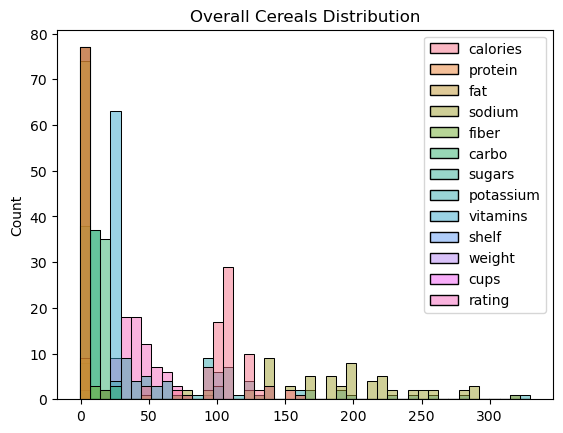

In [13]:
sns.histplot(data = df)
plt.title('Overall Cereals Distribution')
plt.show()

#### Our data indicates right skewed, indicating a positive skewed in data distribution.

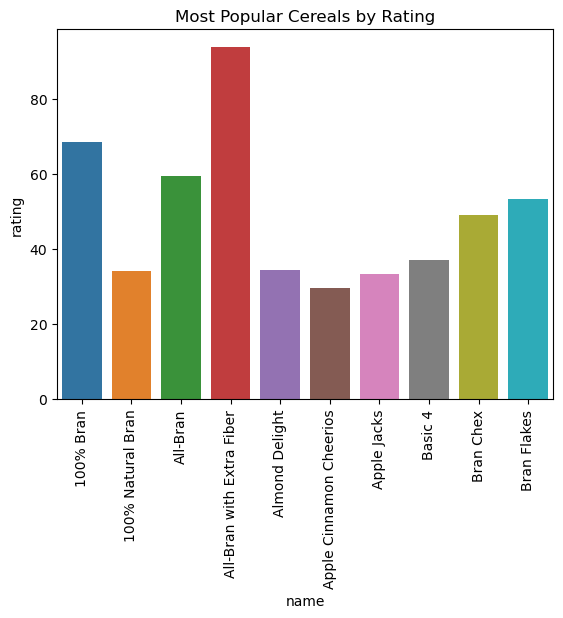

In [21]:
data = df.sort_values(by = 'rating' , ascending= False)
top_cereals = data[['name', 'rating']].reset_index(drop=True)
sns.barplot(data = df.head(10), x = 'name',y='rating')
plt.xticks(rotation=90)
plt.title('Most Popular Cereals by Rating')
plt.show()

#### All-bran with extra fiber from kellogs is the most popular among all followed by 100% bran from nabisco and all bran from kellogs

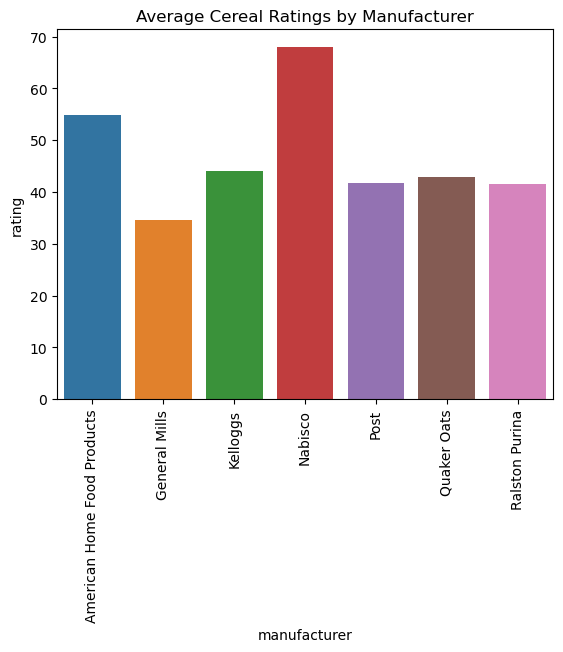

In [22]:
mfr = df.groupby('manufacturer').agg({'rating' : 'mean'}).reset_index()
sns.barplot(data = mfr, x='manufacturer',y='rating')
plt.title('Average Cereal Ratings by Manufacturer')
plt.xticks(rotation = 90)
plt.show()

In [23]:
nabisco_df = df[df['manufacturer'] == 'Nabisco']

# Calculate the average nutritional features for Nabisco
nabisco_avg_nutrition = nabisco_df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potassium', 'vitamins', 'rating']].mean()
nabisco_avg_nutrition

calories      86.666667
protein        2.833333
fat            0.166667
sodium        37.500000
fiber          4.000000
carbo         16.000000
sugars         1.833333
potassium    120.666667
vitamins       8.333333
rating        67.968567
dtype: float64

In [24]:
# Compare with other manufacturers
other_df = df[df['manufacturer'] != 'N']
other_avg_nutrition = other_df.groupby('manufacturer').agg({
    'calories': 'mean',
    'protein': 'mean',
    'fat': 'mean',
    'sodium': 'mean',
    'fiber': 'mean',
    'carbo': 'mean',
    'sugars': 'mean',
    'potassium': 'mean',
    'vitamins': 'mean',
    'rating': 'mean'
}).reset_index()
other_avg_nutrition

,manufacturer,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,rating
0,American Home Food Products,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,54.850917
1,General Mills,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,34.485852
2,Kelloggs,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,44.038462
3,Nabisco,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,120.666667,8.333333,67.968567
4,Post,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000,41.705744
5,Quaker Oats,95.000000,2.625000,1.750000,92.500000,1.337500,10.000000,5.250000,74.375000,12.500000,42.915990
6,Ralston Purina,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,89.250000,25.000000,41.542997


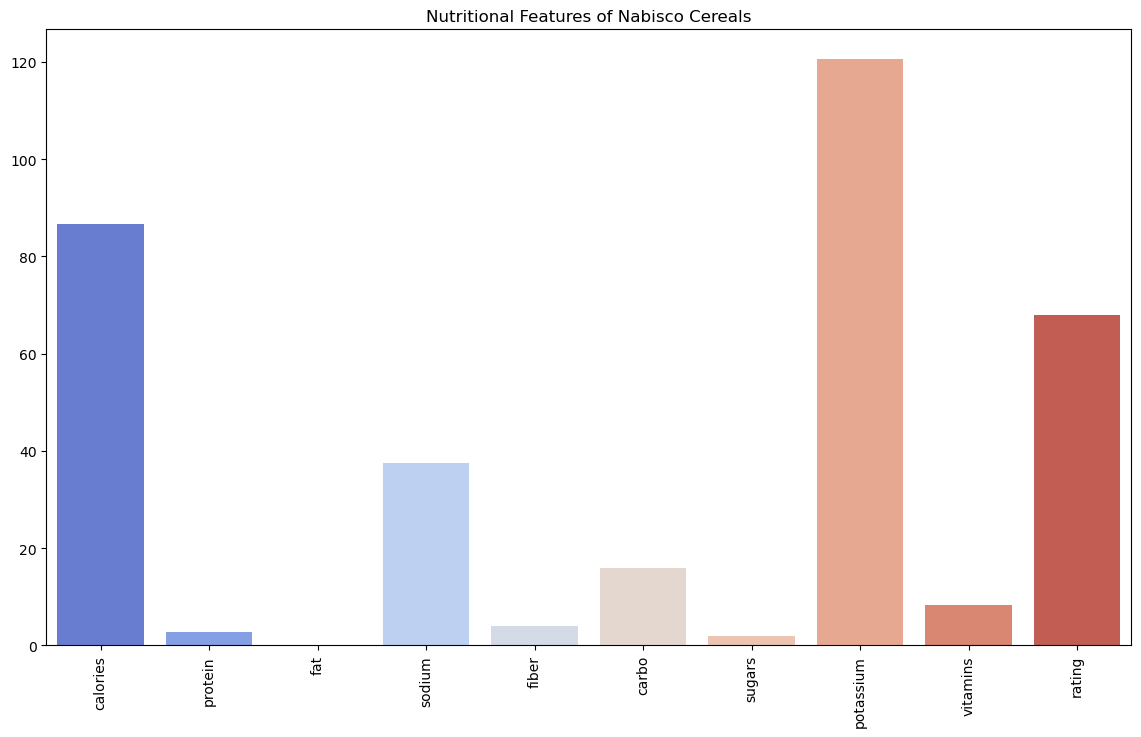

In [25]:
plt.figure(figsize=(14, 8))
# Plot for Nabisco
sns.barplot(x=nabisco_avg_nutrition.index, y=nabisco_avg_nutrition.values, palette='coolwarm')
plt.title('Nutritional Features of Nabisco Cereals')
plt.xticks(rotation=90)
plt.show()

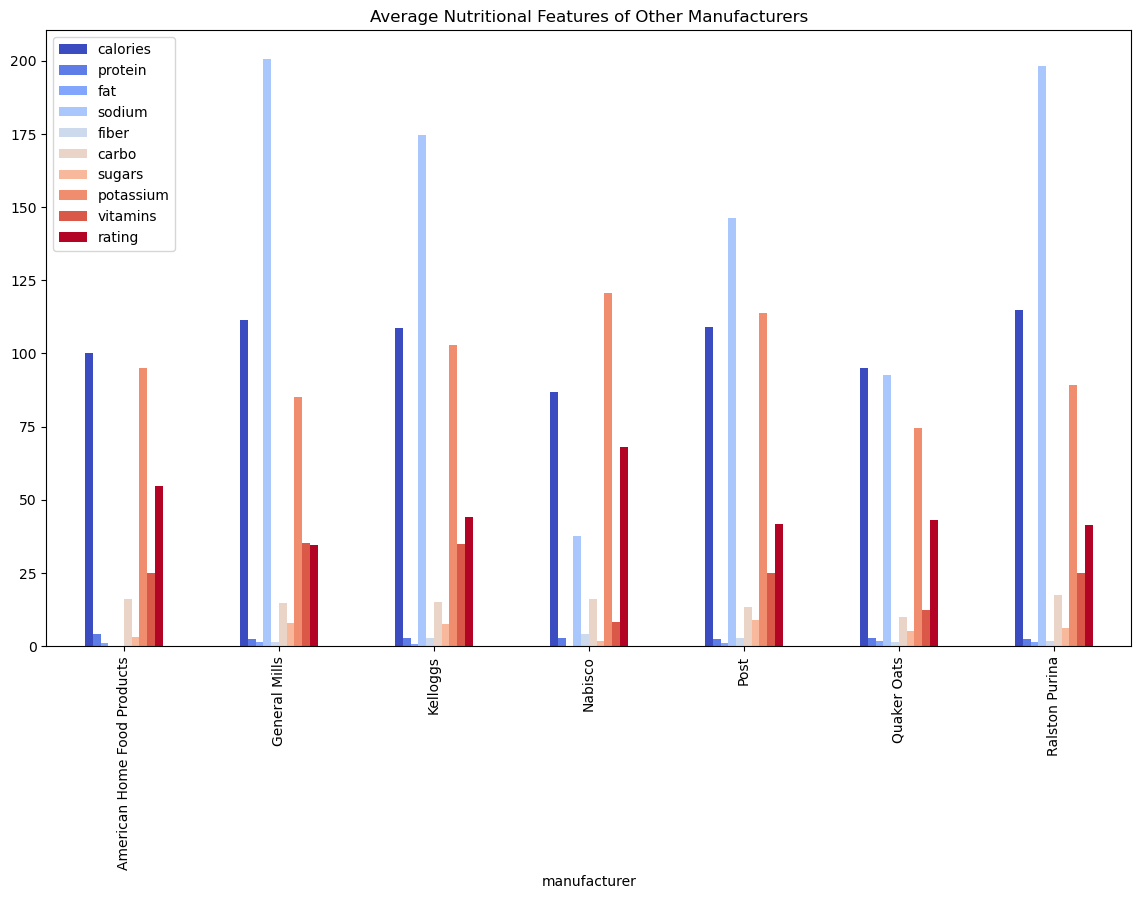

In [26]:
# Plot for other manufacturers
other_avg_nutrition.set_index('manufacturer').plot(kind='bar', figsize=(14, 8), colormap='coolwarm', ax=plt.gca())
plt.title('Average Nutritional Features of Other Manufacturers')
plt.xticks(rotation=90)
plt.show()

#### Nabisco cereals generally appear to have healthier attributes as compared with others:
- Lower Fat and Sodium: Better for reducing fat and sodium intake.
- Higher Fiber: Beneficial for digestive health.
- Lower Sugar: Healthier for maintaining lower sugar consumption.

In [27]:
# finding out what are the nabisco cereals that have higher ratings
n_cereals = df.loc[df['manufacturer'] == 'Nabisco']
n_cereals

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
20,Cream of Wheat (Quick),Nabisco,Hot,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
63,Shredded Wheat,Nabisco,Cold,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,Nabisco,Cold,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,Nabisco,Cold,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
68,Strawberry Fruit Wheats,Nabisco,Cold,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993


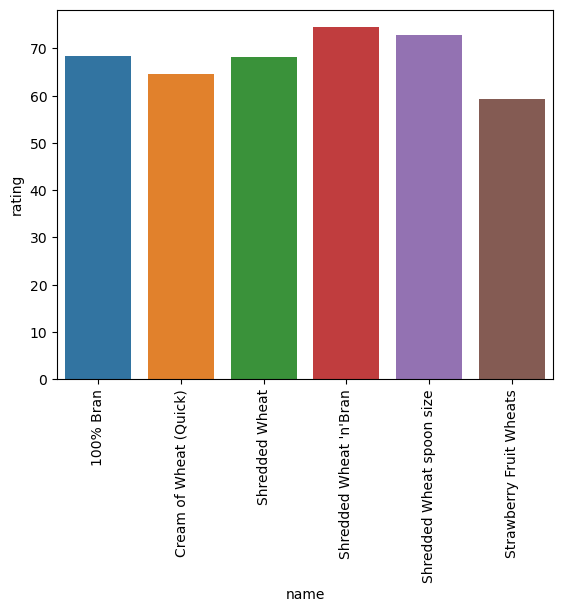

In [34]:
sns.barplot(data = n_cereals,x='name',y='rating')
plt.xticks(rotation = 90)
plt.show()

#### Other than Strawberry Fruit Wheats, all of nabisco cereals seems to fare very well, all have quite good ratings

In [35]:
max_rating = df['rating'].max()
max_rating_cereal = df[df['rating'] == max_rating]

In [37]:
max_rating_cereal[['name', 'manufacturer', 'rating']]

,name,manufacturer,rating
3,All-Bran with Extra Fiber,Kelloggs,93.704912


## Finding Cereals with high fiber, high protein and low sugar content

In [45]:
high_fiber_threshold = df['fiber'].quantile(0.75) 
high_protein_threshold = df['protein'].quantile(0.75) 
low_sugar_threshold = df['sugars'].quantile(0.25) 

In [46]:
filtered_cereals = df[(df['fiber'] >= high_fiber_threshold) & 
                      (df['protein'] >= high_protein_threshold) &
                      (df['sugars'] <= low_sugar_threshold)]

In [54]:
cereal_names = filtered_cereals[['name', 'manufacturer', 'fiber', 'protein', 'sugars']]
cereal_names.sort_values(by='sugars')

,name,manufacturer,fiber,protein,sugars
3,All-Bran with Extra Fiber,Kelloggs,14.0,4,0
64,Shredded Wheat 'n'Bran,Nabisco,4.0,3,0
65,Shredded Wheat spoon size,Nabisco,3.0,3,0
50,Nutri-grain Wheat,Kelloggs,3.0,3,2
33,Grape-Nuts,Post,3.0,3,3
71,Total Whole Grain,General Mills,3.0,3,3
74,Wheat Chex,Ralston Purina,3.0,3,3
75,Wheaties,General Mills,3.0,3,3


- All-Bran with Extra Fiber is the best option for high fiber and protein with no sugar, while other cereals offer a balance of fiber, protein, and low sugar.
- Other cereals like Shredded Wheat 'n' Bran and Shredded Wheat spoon size also offer good nutritional value with similar benefits

In [57]:
avg_sugar = df.groupby('type')['sugars'].mean().reset_index()
avg_sugar

,type,sugars
0,Cold,7.175676
1,Hot,0.666667


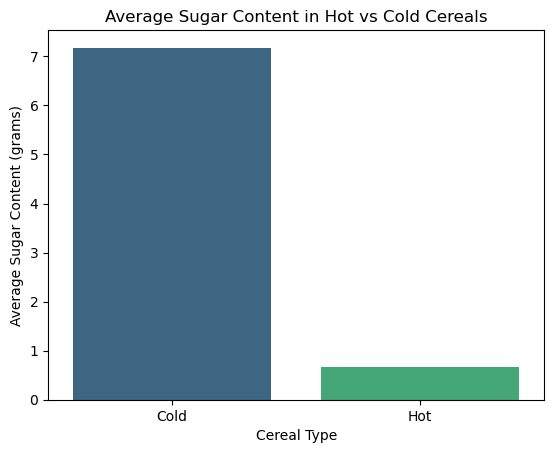

In [56]:
sns.barplot(data=avg_sugar, x='type', y='sugars', palette='viridis')
plt.title('Average Sugar Content in Hot vs Cold Cereals')
plt.xlabel('Cereal Type')
plt.ylabel('Average Sugar Content (grams)')
plt.show()

- Cold cereals generally contain much more sugar than hot cereals.

In [59]:
cold_cereals = df[df['type'] == 'Cold']
cold_cereals

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,Cold,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,General Mills,Cold,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Ralston Purina,Cold,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,General Mills,Cold,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [60]:
hot_cereals = df[df['type'] == 'Hot']
hot_cereals

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),Nabisco,Hot,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
43,Maypo,American Home Food Products,Hot,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Quaker Oats,Hot,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


<Axes: xlabel='name', ylabel='rating'>

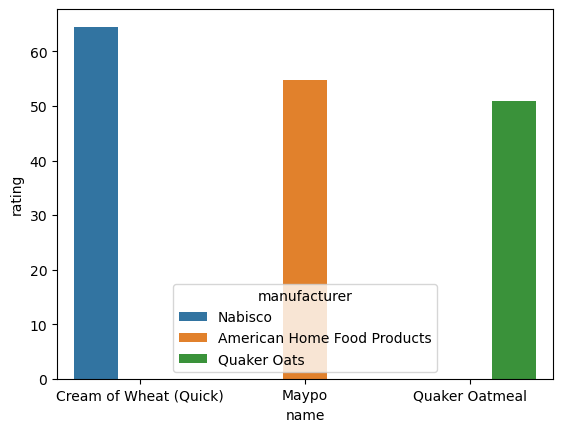

In [64]:
sns.barplot(data = hot_cereals, x = 'name',hue='manufacturer',y='rating')

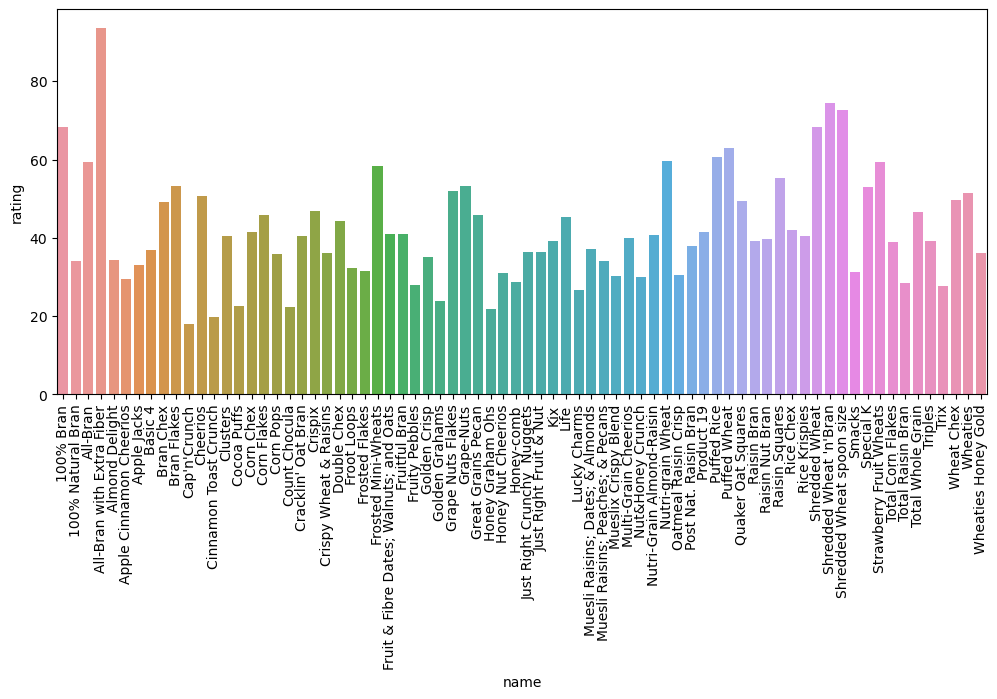

In [68]:
plt.figure(figsize=(12,5))
sns.barplot(data=cold_cereals,x='name',y='rating')
plt.xticks(rotation = 90)
plt.show()